In [207]:
# http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/
import numpy as np
import pandas as pd

# results_merged.csv has some answers modified, so the
# comma (',') character is replaced by semicolon (';') for
# easier processing
results_raw = pd.read_csv('result'
                          's_merged.csv')
# this raw is duplicated
results_raw = results_raw.drop([32])

In [208]:
# main_questions_results = results[['Do you use macroexecutor?', 'Do you use sequencer?']]
def normalize_results(results_raw):
    results_norm = results_raw.replace('ALBA synchrotron', 'ALBA')
    results_norm = results_norm.replace('ALBA Synchrotron', 'ALBA')
    results_norm = results_norm.replace('Alba', 'ALBA')
    results_norm = results_norm.replace('CELLS ALBA', 'ALBA')
    results_norm = results_norm.replace('IPANEMA (CNRS Lab) close to Soleil Sychrotron', 'IPANEMA')
    results_norm = results_norm.replace('DESY / PETRA III', 'DESY')
    results_norm = results_norm.replace('PETRAIII', 'DESY')
    results_norm = results_norm.replace('DESY ', 'DESY')
    results_norm = results_norm.replace('DESY Synchrotron', 'DESY')
    results_norm = results_norm.replace('DESY PETRA III', 'DESY')
    results_norm = results_norm.replace('HZG (Desy)', 'DESY')
    results_norm = results_norm.replace('DESY - Petra', 'DESY')
    results_norm = results_norm.replace('MAX-IV', 'MAX IV')
    results_norm = results_norm.replace('National Synchrotron Radiation Centre SOLARIS', 'SOLARIS')
    results_norm = results_norm.replace('Max-Born-Institute', 'MBI')
    results_norm = results_norm.replace('MBI Berlin', 'MBI')
    results_norm = results_norm.replace('No', 0)
    results_norm = results_norm.replace('No and this feature does not have sense to me', 0)
    results_norm = results_norm.replace('No and this tool does not have sense to me', 0)
    results_norm = results_norm.replace('No and this feature does not make sense to me', 0)
    results_norm = results_norm.replace('No and this does not have sense to me', 0)
    results_norm = results_norm.replace('No and this attribute does not make sense to me', 0)
    results_norm = results_norm.replace('No and this feature does not make sense to me,', 0)
    results_norm = results_norm.replace('No and this optimization does not make sense to me', 0)
    results_norm = results_norm.replace('Not now and I doubt I will do in the future', 1)
    results_norm = results_norm.replace('Not now and I doubt I will use it in the future', 1)
    results_norm = results_norm.replace('Not now and I doubt I will use them in the future', 1)
    results_norm = results_norm.replace('Not now and I doubt I will do it in the future', 1)
    results_norm = results_norm.replace('Not now and I doubt I will use it in the future', 1)
    results_norm = results_norm.replace('Not now and I doubt I will give me benefits in the future', 1)
    results_norm = results_norm.replace('No, I think I would stick to the spock syntax even if the python based syntax was available', 1)
    results_norm = results_norm.replace('I would change it but, it make sense', 2)
    results_norm = results_norm.replace('Not now but I may do in the future', 2)
    results_norm = results_norm.replace('Not now but I may use it in the future', 2)
    results_norm = results_norm.replace('Not now but I may use them in the future', 2)
    results_norm = results_norm.replace('Not now but I may do it in the future', 2)
    results_norm = results_norm.replace('If available I would still use the spock syntax but maybe at some point in the future I would switch to the python based syntax.', 2)
    results_norm = results_norm.replace('Not now but it may give me benefits in the future', 2)
    results_norm = results_norm.replace('Yes', 3)
    results_norm = results_norm.replace('Yes, I would directly switch to it whenever available', 3)
    results_norm = results_norm.replace('trigger/gate, Multimotor in combination with various hardware does require custom modules. Taurus form widgets are useful, but often we need more flexibility on customization and more compact interfaces. Beamline has too many components and taurusforms are quick to build, but overcrowd user working space.', 'trigger/gate')
    return results_norm

results_norm = normalize_results(results_raw)

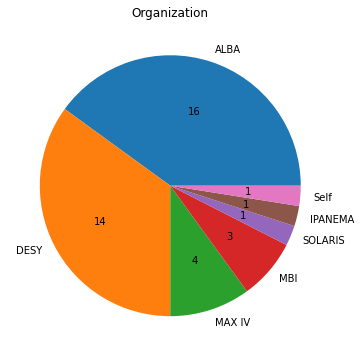

In [209]:
institutes = results_norm['Organization']
institutes_counts = institutes.value_counts()
institutes_counts_total = institutes_counts.values.sum()
institutes_plot = institutes_counts.plot.pie(
    figsize=(6, 6),
    autopct=lambda p: '{:.0f}'.format(p * institutes_counts_total / 100),
    ylabel='')
institutes_plot.set_title(institutes.name)
institutes_plot.get_figure().savefig(
    'results/institutes_participation.png',
    facecolor='white',
    edgecolor='none',
    bbox_inches='tight')

In [210]:
# IPANEMA and MBI (3) counts as Beamline
installation_type = pd.Series({
    'Beamline': 34,
    'Accelerator Sub-system': 2,
    'Laboratory': 4,
    'General Control System': 1,
    'Unknown': 1
}, name='Installation type',)

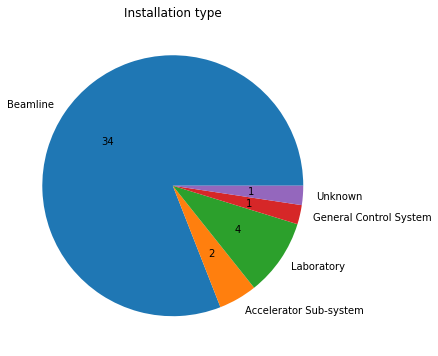

In [211]:
installation_type_total = installation_type.values.sum()
installation_type_plot = installation_type.plot.pie(
    figsize=(6, 6),
    autopct=lambda p: '{:.0f}'.format(p * installation_type_total / 100),
    ylabel=''
)
installation_type_plot.set_title(installation_type.name)
installation_type_plot.get_figure().savefig(
    'results/installation_type.png',
    facecolor='white',
    edgecolor='none',
    bbox_inches='tight');

In [212]:
def calc_counts(questions):
    questions_results = results_norm[questions]
    questions_counts = questions_results.apply(lambda x: x.value_counts()).T
    questions_counts = questions_counts.replace(float('NaN'), 0)
    return questions_counts

def calc_score(questions_counts):
    questions_counts_with_score = questions_counts.copy()
    questions_counts_with_score['score'] = (
        questions_counts[1] * 1
        + questions_counts[2] * 2
        + questions_counts[3] * 4
    )
    return questions_counts_with_score.sort_values('score')

In [249]:
def plot_counts(questions_counts, file_name):
    plot = questions_counts.plot.barh(
        stacked=True,
        color={0: 'blue', 1: 'yellow', 2: 'orange', 3: 'red'}
    )
    plot.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
    for container in plot.containers:
        plot.bar_label(container, label_type='center')
    plot.get_figure().savefig(
        file_name,
        bbox_inches='tight',
        facecolor='white',
        edgecolor='none'
    )

def plot_score(questions_score, file_name):
   plot = questions_score.plot.barh()
   for container in plot.containers:
        plot.bar_label(container, label_type='center')
   plot.get_figure().savefig(
       file_name,
       bbox_inches='tight',
       facecolor='white',
       edgecolor='none'
   )

def calc_multi_choice(question):
    question_results = results_norm[question]
    question_results = question_results.str.split(',').explode().str.strip()
    counts = question_results.value_counts()
    total = counts.values.sum()
    return counts, total

def plot_options(counts, total, file_name):
    plot = counts.plot.pie(
        figsize=(6, 6),
        autopct=lambda p: '{:.0f}'.format(p * total / 100),
        ylabel=''
    )
    plot.set_title(counts.name)
    plot.get_figure().savefig(
        file_name,
        bbox_inches='tight',
        facecolor='white',
        edgecolor='none'
    )

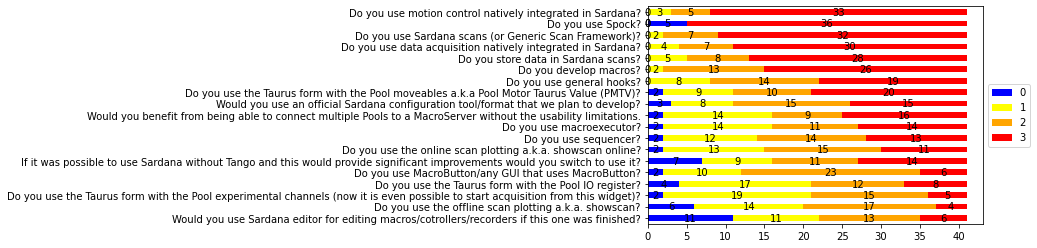

In [214]:
main_questions = [
    'Do you use Spock?',
    'Do you use macroexecutor?',
    'Do you use MacroButton/any GUI that uses MacroButton?',
    'Do you use sequencer?',
    'Do you use the online scan plotting a.k.a. showscan online?',
    'Do you use the offline scan plotting a.k.a. showscan?',
    'Do you use the Taurus form with the Pool moveables a.k.a Pool Motor Taurus Value (PMTV)?',
    'Do you use the Taurus form with the Pool experimental channels (now it is even possible to start acquisition from this widget)?',
    'Do you use the Taurus form with the Pool IO register?',
    'Would you use Sardana editor for editing macros/cotrollers/recorders if this one was finished?',
    'Do you develop macros?',
    'Do you use general hooks?',
    'Do you use Sardana scans (or Generic Scan Framework)?',
    'Do you store data in Sardana scans?',
    'Do you use data acquisition natively integrated in Sardana?',
    'Do you use motion control natively integrated in Sardana?',
    'Would you use an official Sardana configuration tool/format that we plan to develop?',
    'Would you benefit from being able to connect multiple Pools to a MacroServer without the usability limitations.',
    'If it was possible to use Sardana without Tango and this would provide significant improvements would you switch to use it?'
]
main_questions_counts = calc_counts(main_questions)
main_questions_counts_with_score = calc_score(main_questions_counts)

plot_counts(
    main_questions_counts_with_score[[0, 1, 2, 3]],
    'results/main_questions_counts.png'
)


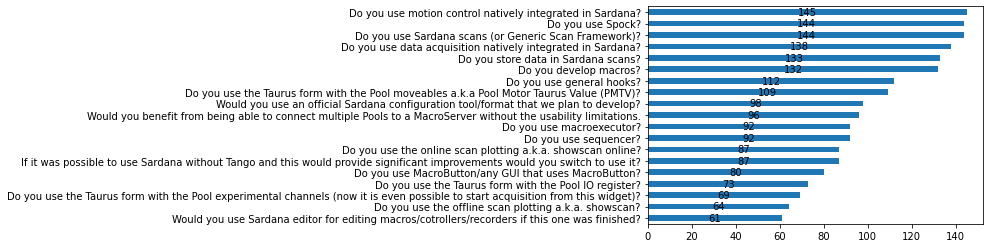

In [215]:
plot_score(
    main_questions_counts_with_score['score'],
    file_name='results/main_questions_score.png'
)

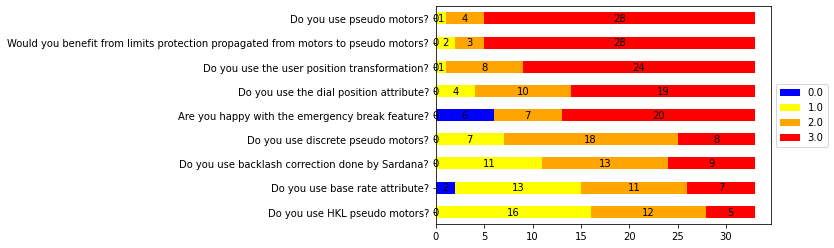

In [216]:
motion_questions = [
    'Do you use backlash correction done by Sardana?',
    'Would you benefit from limits protection propagated from motors to pseudo motors?',
    'Do you use the user position transformation?',
    'Do you use the dial position attribute?',
    'Do you use base rate attribute?',
    'Are you happy with the emergency break feature?',
    'Do you use pseudo motors?',
    'Do you use discrete pseudo motors?',
    'Do you use HKL pseudo motors?',
]
motion_questions_counts = calc_counts(motion_questions)
motion_questions_counts_with_score = calc_score(motion_questions_counts)

plot_counts(
    motion_questions_counts_with_score[[0, 1, 2, 3]],
    'results/motion_questions_counts.png'
)


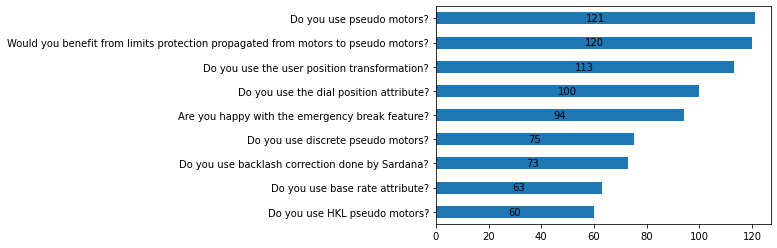

In [217]:
plot_score(
    motion_questions_counts_with_score['score'],
    file_name='results/motion_questions_score.png'
)

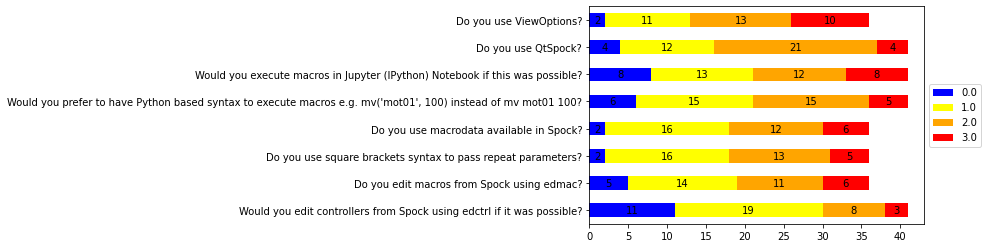

In [218]:
spock_questions = [
    'Do you use square brackets syntax to pass repeat parameters?',
    'Do you use macrodata available in Spock?',
    'Do you edit macros from Spock using edmac?',
    'Do you use ViewOptions?',
    'Would you prefer to have Python based syntax to execute macros e.g. mv(\'mot01\', 100) instead of mv mot01 100?',
    'Do you use QtSpock?',
    'Would you execute macros in Jupyter (IPython) Notebook if this was possible?',
    'Would you edit controllers from Spock using edctrl if it was possible?'
]
spock_questions_counts = calc_counts(spock_questions)
spock_questions_counts_with_score = calc_score(spock_questions_counts)

plot_counts(
    spock_questions_counts_with_score[[0, 1, 2, 3]],
    'results/spock_questions_counts.png'
)

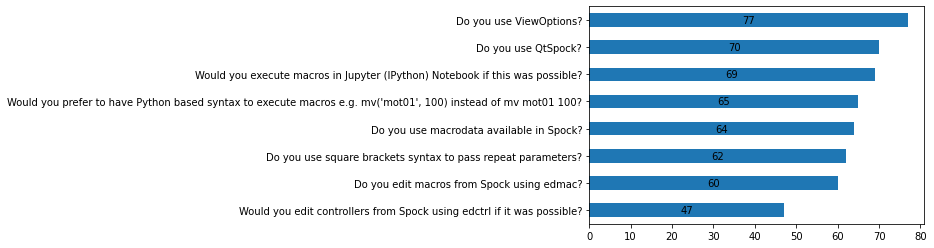

In [219]:
plot_score(
    spock_questions_counts_with_score['score'],
    file_name='results/spock_questions_score.png'
)

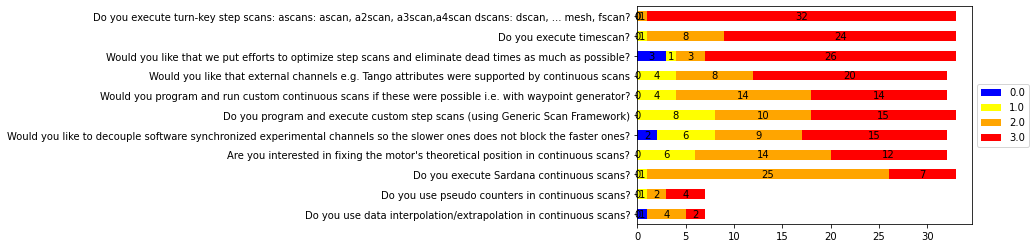

In [220]:
scan_questions = [
    'Do you execute turn-key step scans: ascans: ascan, a2scan, a3scan,a4scan dscans: dscan, ... mesh, fscan?',
    'Do you program and execute custom step scans (using Generic Scan Framework)',
    'Would you like that we put efforts to optimize step scans and eliminate dead times as much as possible?',
    'Do you execute timescan?',
    'Do you execute Sardana continuous scans?',
    'Do you use data interpolation/extrapolation in continuous scans?',
    'Do you use pseudo counters in continuous scans?',
    'Would you program and run custom continuous scans if these were possible i.e. with waypoint generator?',
    'Would you like that external channels e.g. Tango attributes were supported by continuous scans',
    'Are you interested in fixing the motor\'s theoretical position in continuous scans?',
    'Would you like to decouple software synchronized experimental channels so the slower ones does not block the faster ones?'
]
scan_questions_counts = calc_counts(scan_questions)
scan_questions_counts_with_score = calc_score(scan_questions_counts)

plot_counts(
    scan_questions_counts_with_score[[0, 1, 2, 3]],
    'results/scan_questions_counts.png'
)

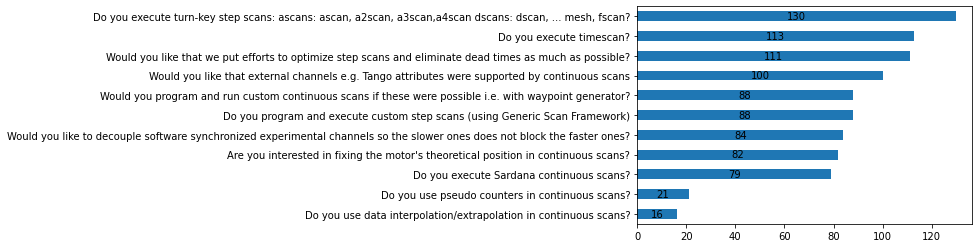

In [221]:
plot_score(
    scan_questions_counts_with_score['score'],
    file_name='results/scan_questions_score.png'
)

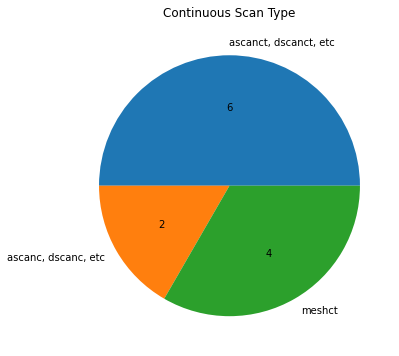

In [222]:
contscan_type = pd.Series({
    'ascanct, dscanct, etc': 6,
    'ascanc, dscanc, etc': 2,
    'meshct': 4
}, name='Continuous Scan Type',)

contscan_type_total = contscan_type.values.sum()
contscan_type_plot = contscan_type.plot.pie(
    figsize=(6, 6),
    autopct=lambda p: '{:.0f}'.format(p * contscan_type_total / 100),
    ylabel=''
)
contscan_type_plot.set_title(contscan_type.name)
contscan_type_plot.get_figure().savefig(
    'results/contscan_type.png',
    facecolor='white',
    edgecolor='none',
    bbox_inches='tight');

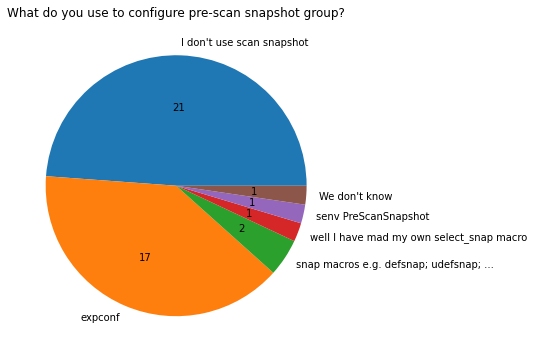

In [223]:
calc_and_plot_multi_choice('What do you use to configure pre-scan snapshot group?',
                           'results/snapshot_conf.png')

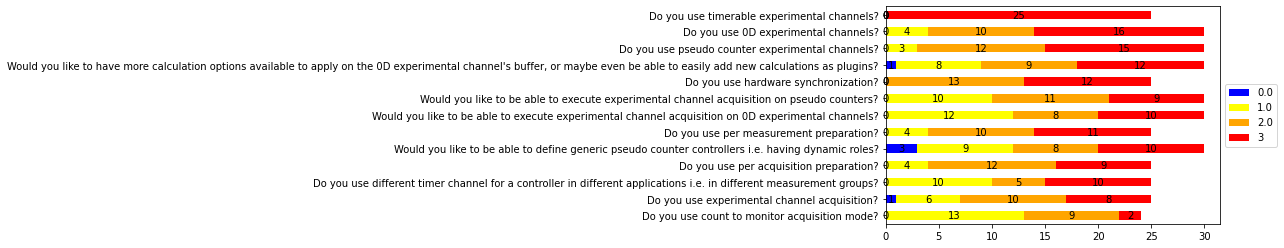

In [224]:
acquisition_questions = [
    'Do you use timerable experimental channels?',
    'Do you use different timer channel for a controller in different applications i.e. in different measurement groups?',
    'Do you use count to monitor acquisition mode?',
    'Do you use per measurement preparation?',
    'Do you use per acquisition preparation?',
    'Do you use hardware synchronization?',
    'Do you use experimental channel acquisition?',
    'Do you use 0D experimental channels?',
    'Would you like to have more calculation options available to apply on the 0D experimental channel\'s buffer, or maybe even be able to easily add new calculations as plugins?',
    'Would you like to be able to execute experimental channel acquisition on 0D experimental channels?',
    'Do you use pseudo counter experimental channels?',
    'Would you like to be able to execute experimental channel acquisition on pseudo counters?',
    'Would you like to be able to define generic pseudo counter controllers i.e. having dynamic roles?',
]
acquisition_questions_counts = calc_counts(acquisition_questions)
acquisition_questions_counts_with_score = calc_score(acquisition_questions_counts)

plot_counts(
    acquisition_questions_counts_with_score[[0, 1, 2, 3]],
    'results/acquisition_questions_counts.png'
)

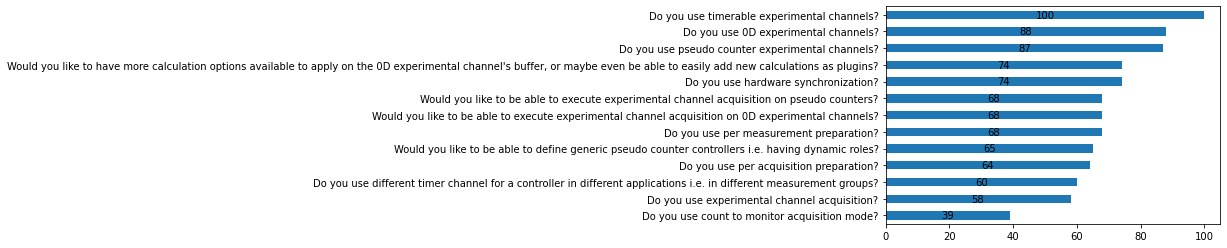

In [225]:
plot_score(
    acquisition_questions_counts_with_score['score'],
    file_name='results/acquisition_questions_score.png'
)


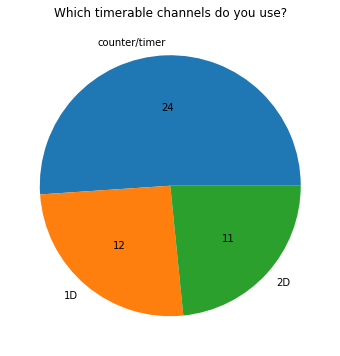

In [226]:
timerable_results = results_norm['Which timerable channels do you use?']
timerable_type_counts = timerable_results.str.split(',').explode().str.strip().value_counts()
timerable_type_total = timerable_type_counts.values.sum()
timerable_type_plot = timerable_type_counts.plot.pie(
    figsize=(6, 6),
    autopct=lambda p: '{:.0f}'.format(p * timerable_type_total / 100),
    ylabel=''
)
timerable_type_plot.set_title(timerable_results.name)
timerable_type_plot.get_figure().savefig(
    'results/timerable_type.png',
    bbox_inches='tight',
    facecolor='white',
    edgecolor='none'
)

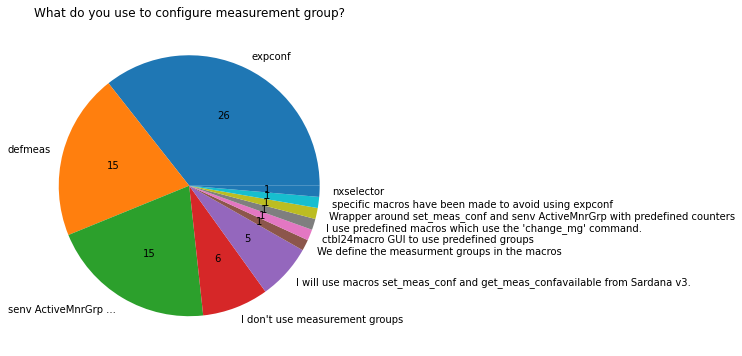

In [227]:
calc_and_plot_multi_choice(
    'What do you use to configure measurement group?',
    'results/meas_config.png'
)

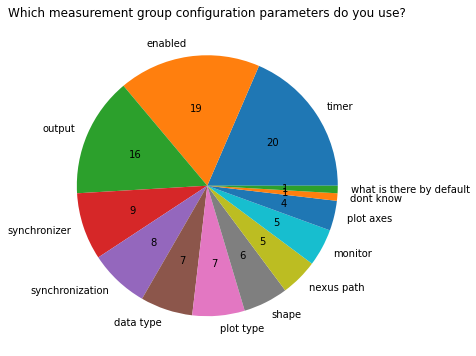

In [228]:
meas_config_param_results = results_norm['Which measurement group configuration parameters do you use?']
meas_config_param_counts = meas_config_param_results.str.split(',').explode().str.strip().value_counts()
meas_config_param_total = meas_config_param_counts.values.sum()
meas_config_param_plot = meas_config_param_counts.plot.pie(
    figsize=(6, 6),
    autopct=lambda p: '{:.0f}'.format(p * meas_config_param_total / 100),
    ylabel=''
)
meas_config_param_plot.set_title(meas_config_param_results.name)
meas_config_param_plot.get_figure().savefig(
    'results/meas_config_param.png',
    bbox_inches='tight',
    facecolor='white',
    edgecolor='none'
);

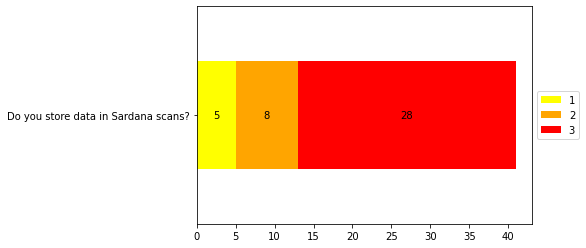

In [229]:
datastorage_counts = calc_counts(['Do you store data in Sardana scans?'])
datastorage_counts_with_score = calc_score(datastorage_counts)

plot_counts(
    datastorage_counts_with_score[[1, 2, 3]],
    'results/datastorage_counts.png'
)

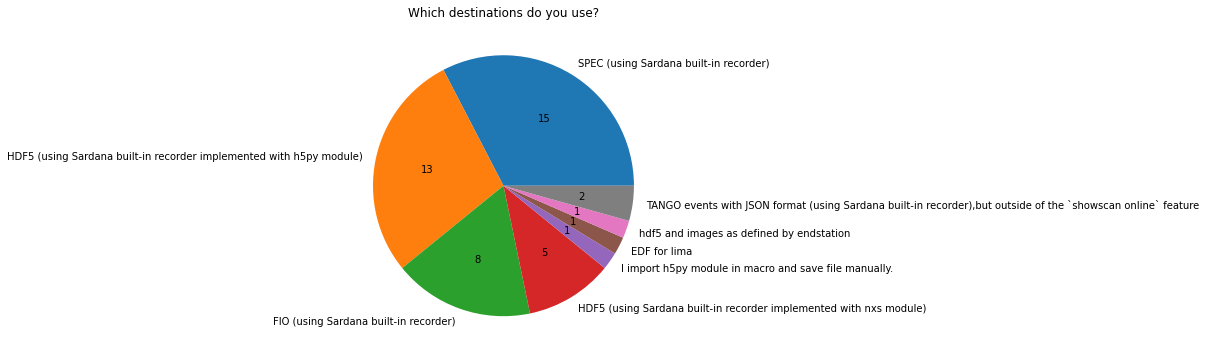

In [230]:
datastorage_dest_results = results_norm['Which destinations do you use?']
datastorage_dest_counts = datastorage_dest_results.str.split(',').explode().str.strip().value_counts()
datastorage_dest_counts['TANGO events with JSON format (using Sardana built-in recorder),but outside of the `showscan online` feature'] = datastorage_dest_counts['TANGO events with JSON format (using Sardana built-in recorder)'] + datastorage_dest_counts['but outside of the `showscan online` feature']
datastorage_dest_counts = datastorage_dest_counts.drop([
    'TANGO events with JSON format (using Sardana built-in recorder)',
    'but outside of the `showscan online` feature'])
datastorage_dest_total = datastorage_dest_counts.values.sum()
datastorage_dest_plot = datastorage_dest_counts.plot.pie(
    figsize=(6, 6),
    autopct=lambda p: '{:.0f}'.format(p * datastorage_dest_total / 100),
    ylabel=''
)
datastorage_dest_plot.set_title(datastorage_dest_results.name)
datastorage_dest_plot.get_figure().savefig(
    'results/datastorage_dest.png',
    bbox_inches='tight',
    facecolor='white',
    edgecolor='none'
);

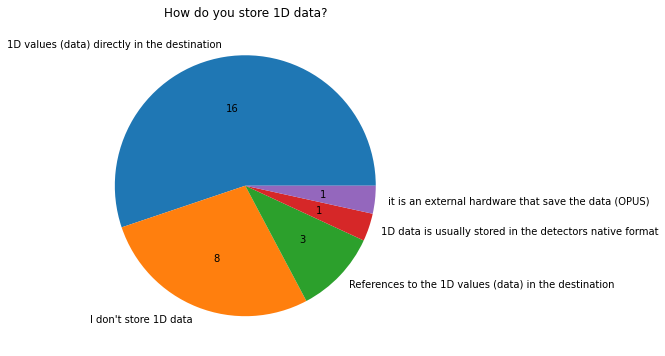

In [231]:
datastorage_1d = results_norm['How do you store 1D data?']
datastorage_1d_counts = datastorage_1d.value_counts()
datastorage_1d_total = datastorage_1d_counts.values.sum()
datastorage_1d_plot = datastorage_1d_counts.plot.pie(
    figsize=(6, 6),
    autopct=lambda p: '{:.0f}'.format(p * datastorage_1d_total / 100),
    ylabel=''
)
datastorage_1d_plot.set_title(datastorage_1d.name)
datastorage_1d_plot.get_figure().savefig(
    'results/datastorage_1d.png',
    facecolor='white',
    edgecolor='none',
    bbox_inches='tight')

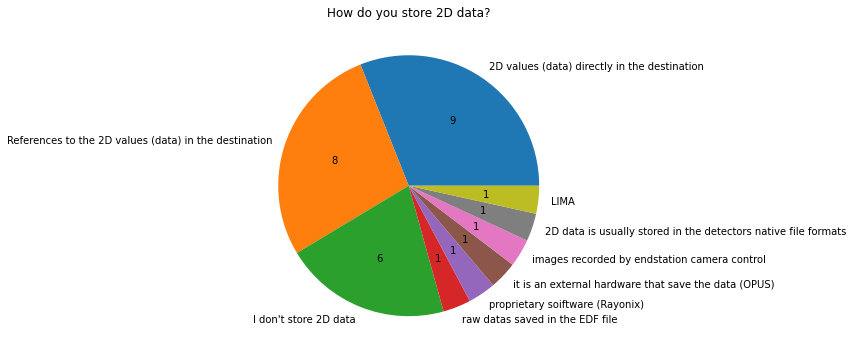

In [232]:
datastorage_2d = results_norm['How do you store 2D data?']
datastorage_2d_counts = datastorage_2d.value_counts()
datastorage_2d_total = datastorage_2d_counts.values.sum()
datastorage_2d_plot = datastorage_2d_counts.plot.pie(
    figsize=(6, 6),
    autopct=lambda p: '{:.0f}'.format(p * datastorage_2d_total / 100),
    ylabel=''
)
datastorage_2d_plot.set_title(datastorage_2d.name)
datastorage_2d_plot.get_figure().savefig(
    'results/datastorage_2d.png',
    facecolor='white',
    edgecolor='none',
    bbox_inches='tight')

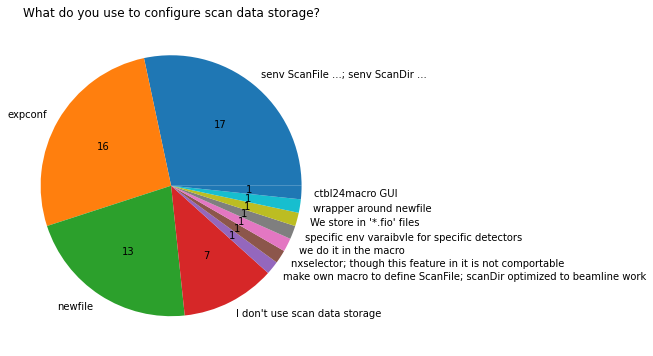

In [250]:
datastorage_conf_counts, datastorage_conf_total = calc_multi_choice(
    'What do you use to configure scan data storage?',
)
plot_options(
    datastorage_conf_counts,
    datastorage_conf_total,
    'results/datastorage_conf.png'
)


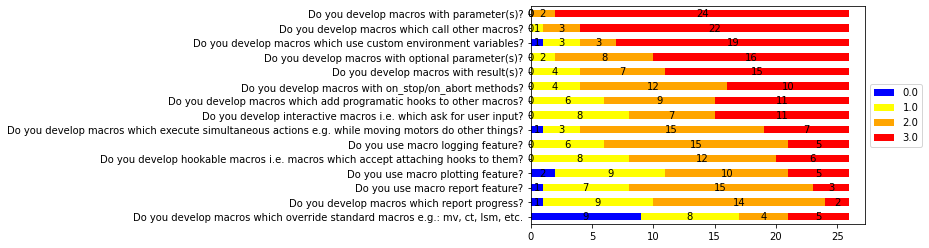

In [234]:
macros_questions = [
    'Do you develop macros with parameter(s)?',
    'Do you develop macros with optional parameter(s)?',
    'Do you develop macros with result(s)?',
    'Do you develop macros which call other macros?',
    'Do you develop macros which add programatic hooks to other macros?',
    'Do you develop hookable macros i.e. macros which accept attaching hooks to them?',
    'Do you develop macros which use custom environment variables?',
    'Do you use macro logging feature?',
    'Do you use macro report feature?',
    'Do you develop macros with on_stop/on_abort methods?',
    'Do you use macro plotting feature?',
    'Do you develop macros which report progress?',
    'Do you develop macros which execute simultaneous actions e.g. while moving motors do other things?',
    'Do you develop interactive macros i.e. which ask for user input?',
    'Do you develop macros which override standard macros e.g.: mv, ct, lsm, etc.'
]

macros_questions_counts = calc_counts(macros_questions)
macros_questions_counts_with_score = calc_score(macros_questions_counts)

plot_counts(
    macros_questions_counts_with_score[[0, 1, 2, 3]],
    'results/macros_questions_counts.png'
)

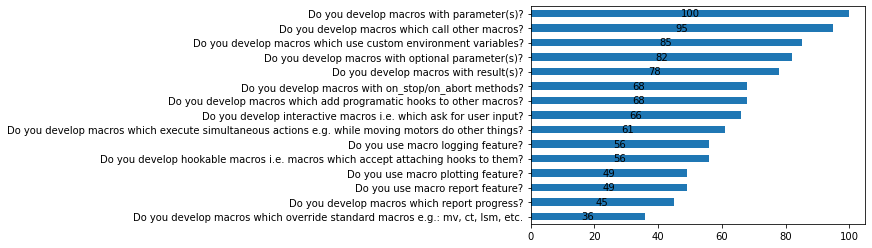

In [235]:
plot_score(
    macros_questions_counts_with_score['score'],
    file_name='results/macros_questions_score.png'
)


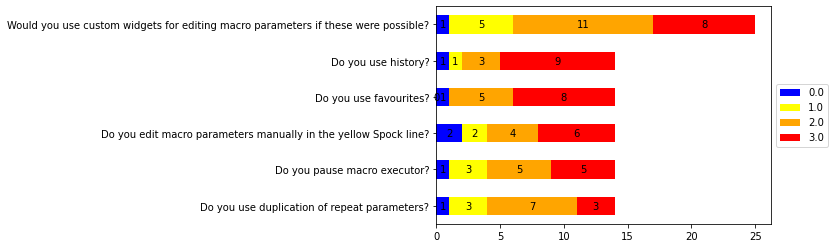

In [236]:
macroexecutor_questions = [
    'Do you use favourites?',
    'Do you use history?',
    'Do you use duplication of repeat parameters?',
    'Do you pause macro executor?',
    'Do you edit macro parameters manually in the yellow Spock line?',
    'Would you use custom widgets for editing macro parameters if these were possible?'
]

macroexecutor_questions_counts = calc_counts(macroexecutor_questions)
macroexecutor_questions_counts_with_score = calc_score(macroexecutor_questions_counts)

plot_counts(
    macroexecutor_questions_counts_with_score[[0, 1, 2, 3]],
    'results/macroexecutor_questions_counts.png'
)

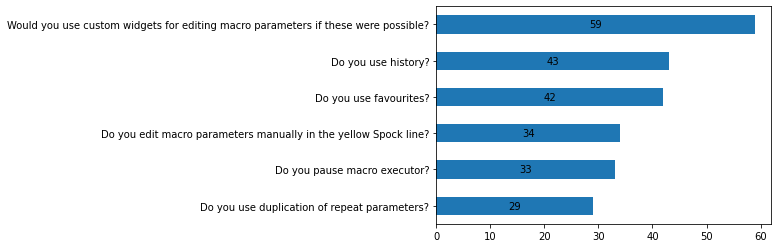

In [237]:
plot_score(
    macroexecutor_questions_counts_with_score['score'],
    file_name='results/macroexecutor_questions_score.png'
)

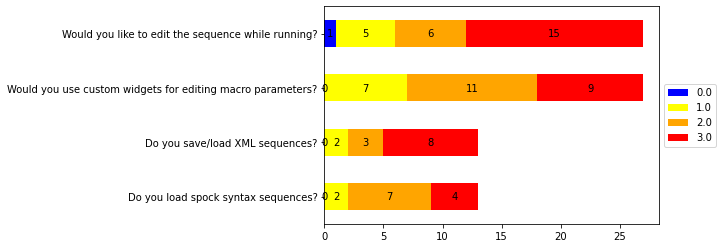

In [238]:
sequencer_questions = [
    'Do you save/load XML sequences?',
    'Do you load spock syntax sequences?',
    'Would you like to edit the sequence while running?',
    'Would you use custom widgets for editing macro parameters?'
]

sequencer_questions_counts = calc_counts(sequencer_questions)
sequencer_questions_counts_with_score = calc_score(sequencer_questions_counts)

plot_counts(
    sequencer_questions_counts_with_score[[0, 1, 2, 3]],
    'results/sequencer_questions_counts.png'
)

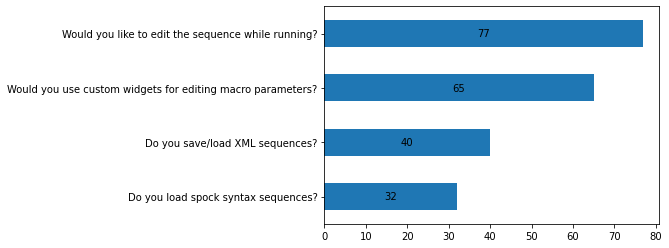

In [239]:
plot_score(
    sequencer_questions_counts_with_score['score'],
    file_name='results/sequencer_questions_score.png'
)

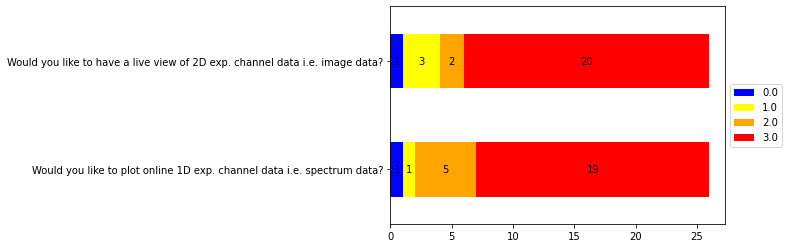

In [240]:
showscan_online_questions = [
    'Would you like to plot online 1D exp. channel data i.e. spectrum data?',
    'Would you like to have a live view of 2D exp. channel data i.e. image data?'
]

showscan_online_questions_counts = calc_counts(showscan_online_questions)
showscan_online_questions_counts_with_score = calc_score(showscan_online_questions_counts)

plot_counts(
    showscan_online_questions_counts_with_score[[0, 1, 2, 3]],
    'results/showscan_online_questions_counts.png'
)

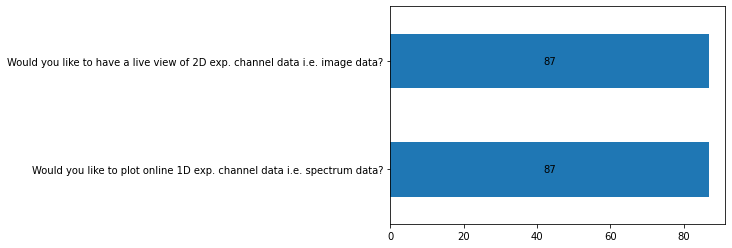

In [241]:
plot_score(
    showscan_online_questions_counts_with_score['score'],
    file_name='results/showscan_online_questions_score.png'
)

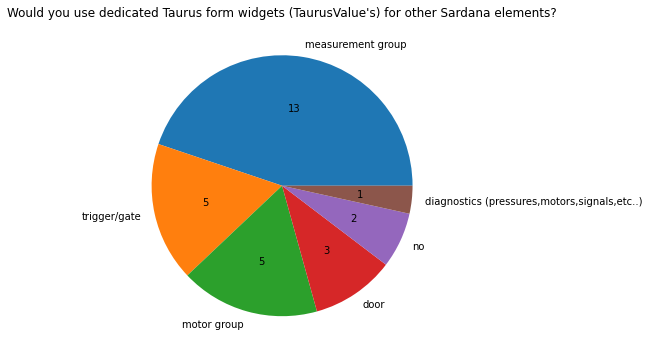

In [242]:
tv_results = results_norm['Would you use dedicated Taurus form widgets (TaurusValue\'s) for other Sardana elements?']
tv_results = tv_results.str.split(',').explode().str.strip()
joined_ans = ','.join(tv_results[3])
tv_results = tv_results.drop(3)
tv_results[3] = joined_ans
tv_counts = tv_results.value_counts()
tv_total = tv_counts.values.sum()

tv_plot = tv_counts.plot.pie(
    figsize=(6, 6),
    autopct=lambda p: '{:.0f}'.format(p * tv_total / 100),
    ylabel=''
)
tv_plot.set_title(tv_results.name)
tv_plot. get_figure().savefig(
    'results/other_tv_widgets.png',
    facecolor='white',
    edgecolor='none',
    bbox_inches='tight');

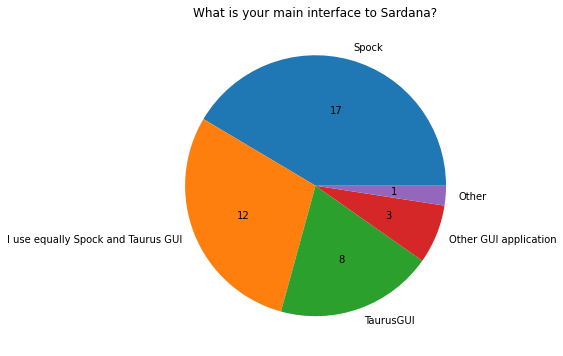

In [243]:
ui = results_norm['What is your main interface to Sardana?']
ui_counts = ui.value_counts()
ui_counts_total = ui_counts.values.sum()
ui_plot = ui_counts.plot.pie(
    figsize=(6, 6),
    autopct=lambda p: '{:.0f}'.format(p * ui_counts_total / 100),
    ylabel='')
ui_plot.set_title(ui.name)
ui_plot.get_figure().savefig(
    'results/main_ui.png',
    facecolor='white',
    edgecolor='none',
    bbox_inches='tight')


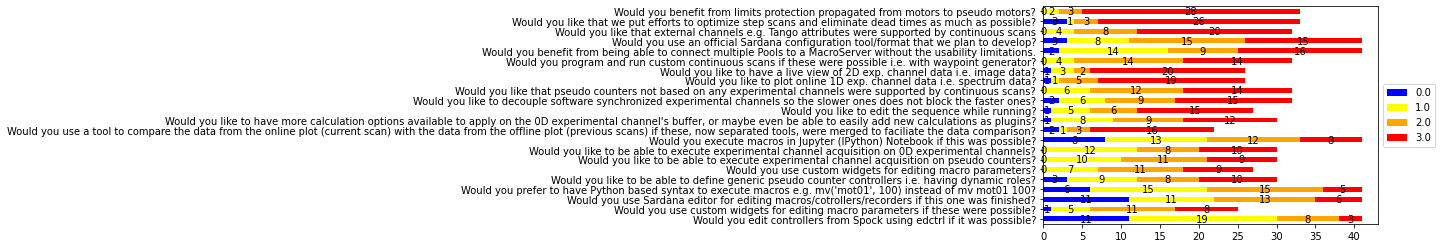

In [244]:
enhancements_questions = [
    'Would you prefer to have Python based syntax to execute macros e.g. mv(\'mot01\', 100) instead of mv mot01 100?',
    'Would you execute macros in Jupyter (IPython) Notebook if this was possible?',
    'Would you edit controllers from Spock using edctrl if it was possible?',
    'Would you use custom widgets for editing macro parameters if these were possible?',
    'Would you like to edit the sequence while running?',
    'Would you use custom widgets for editing macro parameters?',
    'Would you like to plot online 1D exp. channel data i.e. spectrum data?',
    'Would you like to have a live view of 2D exp. channel data i.e. image data?',
    'Would you use a tool to compare the data from the online plot (current scan) with the data from the offline plot (previous scans) if these, now separated tools, were merged to faciliate the data comparison?',
    'Would you use Sardana editor for editing macros/cotrollers/recorders if this one was finished?',
    'Would you like that we put efforts to optimize step scans and eliminate dead times as much as possible?',
    'Would you program and run custom continuous scans if these were possible i.e. with waypoint generator?',
    'Would you like that external channels e.g. Tango attributes were supported by continuous scans',
    'Would you like that pseudo counters not based on any experimental channels were supported by continuous scans?',
    'Would you like to decouple software synchronized experimental channels so the slower ones does not block the faster ones?',
    'Would you like to have more calculation options available to apply on the 0D experimental channel\'s buffer, or maybe even be able to easily add new calculations as plugins?',
    'Would you like to be able to execute experimental channel acquisition on 0D experimental channels?',
    'Would you like to be able to execute experimental channel acquisition on pseudo counters?',
    'Would you like to be able to define generic pseudo counter controllers i.e. having dynamic roles?',
    'Would you benefit from limits protection propagated from motors to pseudo motors?',
    'Would you use an official Sardana configuration tool/format that we plan to develop?',
    'Would you benefit from being able to connect multiple Pools to a MacroServer without the usability limitations.',
]

enhancements_questions_counts = calc_counts(enhancements_questions)
enhancements_questions_counts_with_score = calc_score(enhancements_questions_counts)

plot_counts(
    enhancements_questions_counts_with_score[[0, 1, 2, 3]],
    'results/enhancements_questions_counts.png'
)

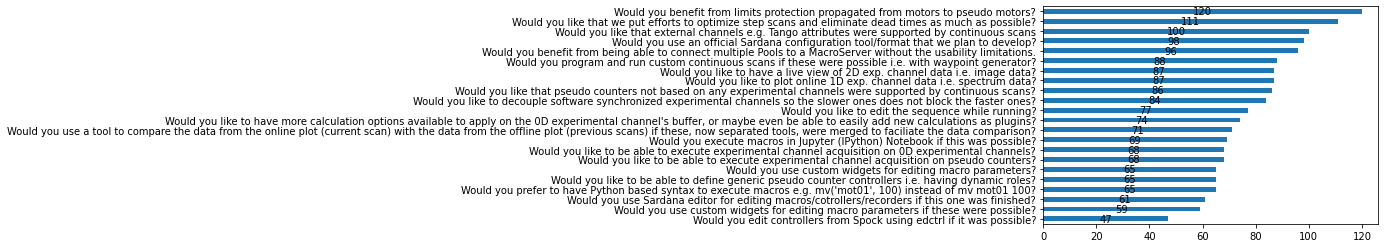

In [245]:
plot_score(
    enhancements_questions_counts_with_score['score'],
    file_name='results/enhancements_questions_score.png'
)

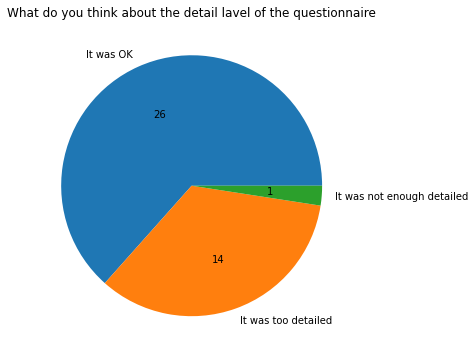

In [251]:
questionnaire_details = results_norm['What do you think about the detail lavel of the questionnaire']
questionnaire_details_counts = questionnaire_details.value_counts()
questionnaire_details_total = questionnaire_details_counts.values.sum()
plot_options(
    questionnaire_details_counts,
    questionnaire_details_total,
    'results/questionnaire_details.png'
)
